# Machine Learning Final Exam, Aug Semester, 2019

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Generate 200 2D points from each of 2 Guassians with distributions shaped roughly as shown in the diagram below, with class 1 as the 'X's and class 2 as the 'O's. Plot the resulting 400 points with different colors for each Gaussian.

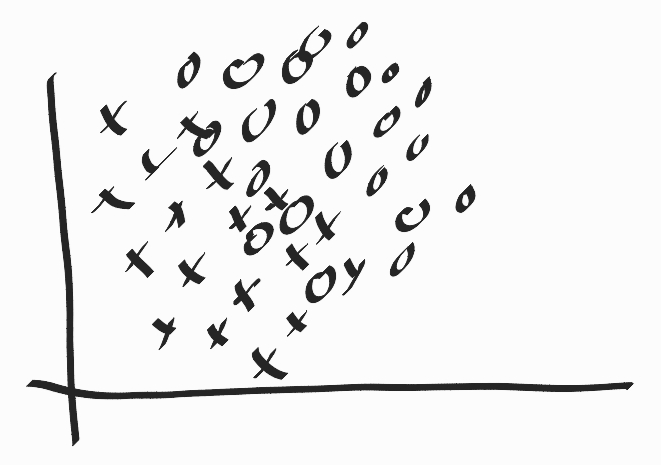

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_30810/1345352462.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal(mu_1, sigma_1,points)
/tmp/ipykernel_30810/1345352462.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mu_2, sigma_2,points)
/tmp/ipykernel_30810/1345352462.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X1[:,0],X1[:,1],cmap='red')
/tmp/ipykernel_30810/1345352462.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2[:,0],X2[:,1],cmap='green')


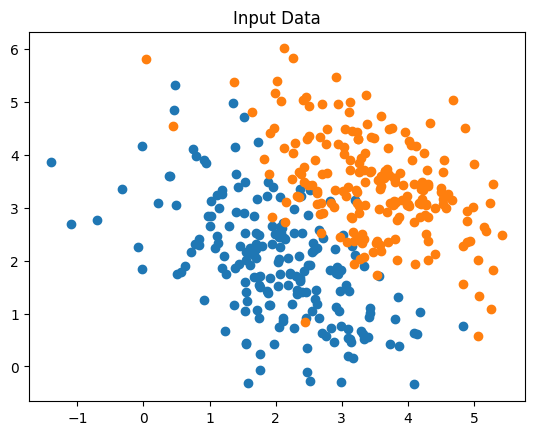

In [18]:
points = 200
mu_1 = np.array([2,2])
mu_2 = np.array([3.5,3.5])
sigma_1 = np.array([[-1, 0.5], [0.5, -1]])
sigma_2 = np.array([[-1, 0.5], [0.5, -1]])
X1 = np.random.multivariate_normal(mu_1, sigma_1,points)
X2 = np.random.multivariate_normal(mu_2, sigma_2,points)
X = np.concatenate((X1,X2),axis=0)

y1 = np.zeros((points,1))
y2 = np.ones((points,1))
y = np.concatenate((y1, y2), 0)

plt.scatter(X1[:,0],X1[:,1],cmap='red')
plt.scatter(X2[:,0],X2[:,1],cmap='green')
plt.title("Input Data")
plt.show()

## Question 2 (20 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [23]:
# Place code to split the data, fit the LR model, output accuracy, and plot the result here
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    #percent_train = 0.6
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test,y_train, y_test

X_train, X_val, y_train, y_val = partition(X, y, 0.8)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(320, 2) (80, 2) (320, 1) (80, 1)


In [24]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j_ep(theta, X, y):   
    epsilon = 1e-13
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred+epsilon)) - ((1 - y) * np.log(1 - y_pred + epsilon))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def j(theta, X, y):   
    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

In [25]:
X_train = np.insert(X_train, 0,1 ,axis=1)
X_val = np.insert(X_val, 0, 1 ,axis=1)
X_train.shape, X_val.shape

((320, 3), (80, 3))

In [26]:
theta_initial = np.zeros((X_train.shape[1], 1))
alpha = 0.001
num_iters = 200000
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[-7.79088459]
 [ 1.56718493]
 [ 1.37331624]]
Cost with optimized theta: 0.21771838735980786


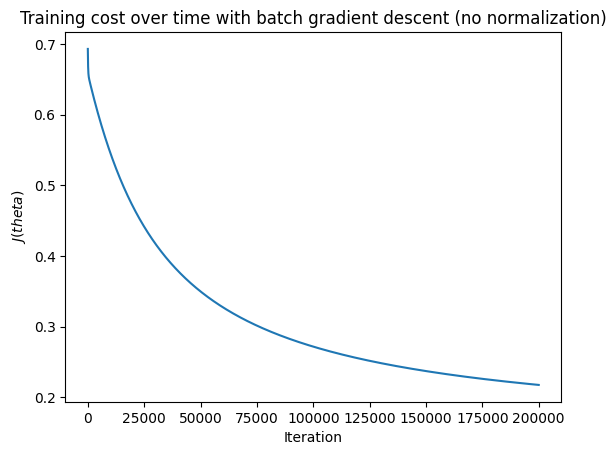

In [28]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

In [29]:
def r_squared(y, y_pred):
    return 1 - (np.square(y - y_pred).sum() / np.square(y - y.mean()).sum())

def get_accuracy(X, y, theta):
    y_test_pred_soft_norm = h(X, theta)
    y_test_pred_hard_norm = (y_test_pred_soft_norm > 0.5).astype(int)
    test_rsq_soft_norm = r_squared(y, y_test_pred_soft_norm)
    test_rsq_hard_norm = r_squared(y, y_test_pred_hard_norm)
    test_acc_norm = (y_test_pred_hard_norm == y).astype(int).sum() / y.shape[0]
    return test_rsq_soft_norm, test_rsq_hard_norm, test_acc_norm

In [33]:
train_acc = get_accuracy(X_train, y_train, theta)
val_acc = get_accuracy(X_val, y_val, theta)

print(f'Train accuracy: {train_acc[2]:0.2f}, Validation Accuracy {val_acc[2]:0.2f}')

Train accuracy: 0.94, Validation Accuracy 0.93


In [34]:
# Change 0.something to 0 or 1
def convert_soft_to_hard(yhat):
    for index, i in enumerate(yhat):
        if i > 0.5:
            yhat[index] = 1
        else:
            yhat[index] = 0
    
    return yhat

yhat_train = h(X_train, theta)
yhat_train = convert_soft_to_hard(yhat_train)
yhat_val = h(X_val, theta)
yhat_val = convert_soft_to_hard(yhat_val)
print(np.unique(yhat_train, return_counts=True))
print(np.unique(yhat_val, return_counts=True))

(array([0., 1.]), array([148, 172]))
(array([0., 1.]), array([40, 40]))


In [35]:
def find_point(yhat, ytest):
    Correct_class0 = []
    Correct_class1 = []
    Incorrect = []
    for index, i in enumerate(yhat):
        if (i == 0) and (ytest[index] == 0):
            Correct_class0.append(index)
        elif (i == 1) and (ytest[index] == 1):
            Correct_class1.append(index)
        else:
            Incorrect.append(index)
    return Correct_class0, Correct_class1, Incorrect

train_Cor0, train_Cor1, train_Incor = find_point(yhat_train, y_train)
val_Cor0, val_Cor1, val_Incor = find_point(yhat_val, y_val)

# convert to numpy array
train_Cor0, train_Cor1, train_Incor = np.array(train_Cor0), np.array(train_Cor1), np.array(train_Incor)
val_Cor0, val_Cor1, val_Incor = np.array(val_Cor0), np.array(val_Cor1), np.array(val_Incor)

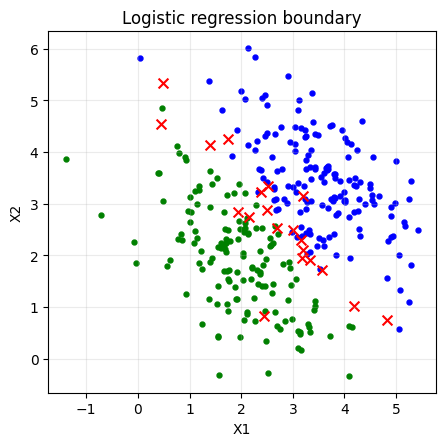

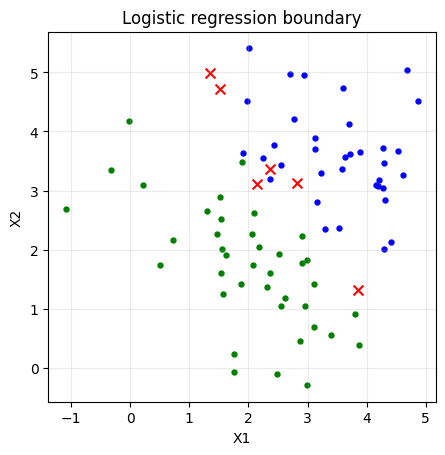

In [36]:
def plot_points(X, cor0, cor1, incor):
    fig1 = plt.figure(figsize=(5,5)) 
    ax = plt.axes() 
    ax.set_aspect(aspect = 'equal', adjustable = 'box')
    plt.title('Logistic regression boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(axis='both', alpha=.25)
    if len(cor0) != 0:
        ax.scatter(X[:, 1][cor0], X[:, 2][cor0], s=50, c='g', marker='.', label='y = 0')
    ax.scatter(X[:, 1][cor1], X[:, 2][cor1], s=50, c='b', marker='.', label='y = 0')
    ax.scatter(X[:, 1][incor], X[:, 2][incor], s=50, c='r', marker='x', label='y = 0')

plot_points(X_train, train_Cor0, train_Cor1, train_Incor)
plot_points(X_val, val_Cor0, val_Cor1, val_Incor)

## Question 3 (20 points)

Do the following:
1. Use the SVM code developed in class to fit linear SVMs to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane), and plot validation set accuracy as a function of c.
2. Explain which model is best and why.

In [2]:
points = 200
mu_1 = np.array([2,2])
mu_2 = np.array([3.5,3.5])
sigma_1 = np.array([[-1, 0.5], [0.5, -1]])
sigma_2 = np.array([[-1, 0.5], [0.5, -1]])
X1 = np.random.multivariate_normal(mu_1, sigma_1,points)
X2 = np.random.multivariate_normal(mu_2, sigma_2,points)
X = np.concatenate((X1,X2),axis=0)

y1 = np.zeros((points,1))
y2 = np.ones((points,1))
y = np.concatenate((y1, y2), 0)

# Place code to split the data, fit the LR model, output accuracy, and plot the result here
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    #percent_train = 0.6
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test,y_train, y_test

X_train, X_val, y_train, y_val = partition(X, y, 0.8)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(320, 2) (80, 2) (320, 1) (80, 1)


/tmp/ipykernel_6357/71996651.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal(mu_1, sigma_1,points)
/tmp/ipykernel_6357/71996651.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mu_2, sigma_2,points)


In [18]:
import numpy as np
import cvxopt

def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

def linear_kernel(X):
    m = X.shape[0]
    K = np.matrix(np.zeros([m,m]))
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = X[i,:]@(X[j,:].T)
    return K

def predict(x, X, y, alpha):
    s = []
    sigma = 0.2
    for j in range(x.shape[0]):
        ss = 0
        for i in range(X.shape[0]):
            ss += alpha[i]*y[i]*np.exp((-(X[i]-x[j])@(X[i]-x[j]))/(2*sigma*sigma))
        s.append(ss)
    s = np.array(s)
    s[s >= 0] = 1
    s[s < 0] = -1
    return s



In [19]:
#Convert 0/1 targets to -1/+1
y_train_svm = y_train
y_train_svm[y_train == 0] = -1
y_test_svm = y_val
y_test_svm[y_val == 0] = -1

In [20]:
X_train.shape,y_train_svm.shape

((320, 2), (320, 1))

In [21]:
m,n = X_train.shape
m,n

(320, 2)

In [22]:
K = linear_kernel(X_train)
Q = np.multiply(y_train_svm * y_train_svm.T, K)
print('Q rank: %d' % np.linalg.matrix_rank(Q))
c = -np.ones([m])
A = -np.eye(m)
b = np.zeros([m])
E = y_train_svm.T
d = np.zeros(1)
alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d)
print("Optimal alpha:")
print(alpha_star)

Q rank: 2
     pcost       dcost       gap    pres   dres
 0: -9.1849e+01 -2.4796e+02  2e+03  4e+01  3e+00
 1: -2.4562e+02 -5.3106e+02  2e+03  3e+01  2e+00
 2: -1.3308e+03 -2.4540e+03  1e+03  2e+01  2e+00
 3: -1.7684e+03 -3.0812e+03  2e+03  2e+01  2e+00
 4: -4.8610e+03 -5.9572e+03  1e+03  2e+01  1e+00
 5: -2.8436e+04 -2.9300e+04  9e+02  1e+01  1e+00
 6: -7.2905e+05 -7.3531e+05  6e+03  1e+01  1e+00
 7: -5.3602e+07 -5.3778e+07  2e+05  1e+01  1e+00
 8: -8.7512e+09 -8.7647e+09  1e+07  1e+01  1e+00
 9: -9.3433e+09 -9.3576e+09  1e+07  1e+01  1e+00
10: -1.4294e+10 -1.4316e+10  2e+07  1e+01  1e+00
11: -1.8781e+10 -1.8810e+10  3e+07  1e+01  1e+00
12: -3.2064e+10 -3.2114e+10  5e+07  1e+01  1e+00
13: -4.1159e+10 -4.1222e+10  6e+07  1e+01  1e+00
14: -5.6007e+10 -5.6092e+10  8e+07  1e+01  1e+00
15: -1.1474e+11 -1.1491e+11  2e+08  1e+01  1e+00
16: -1.4633e+11 -1.4655e+11  2e+08  1e+01  1e+00
17: -2.0579e+11 -2.0609e+11  3e+08  1e+01  1e+00
18: -2.8757e+11 -2.8796e+11  4e+08  1e+01  1e+00
19: -3.6289

In [17]:
y_pred = predict(X_val, X_val, y_val, alpha_star)
print("Accuracy :",np.sum(y_val == y_pred)/y_val.size)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
def get_wb(X, y, alpha):
    # Find the support vectors
    S = alpha > 1e-6
    XS = X[S,:]
    yS = y[S]
    alphaS = alpha[S]
    alphaSyS = np.tile(np.multiply(yS.T, alphaS).T, n)
    w = sum(np.multiply(alphaSyS, XS)).T
    # Find b
    KS = K[S,:][:,S]
    NS = yS.shape[0]
    b = (np.sum(yS) - np.sum(np.multiply(alphaS,yS.T)*KS))/NS
    # Normalize w,b
    scalef = np.linalg.norm(w)
    w = w / scalef
    b = b / scalef
    return w,b

w,b = get_wb(X_train, y_train_svm, alpha_star)

print("Optimal w: [%f,%f] b: %f" % (w[0],w[1],b))
print(w.shape,b.shape)

In [ ]:
def plot_data(X, y):
    X_0 = X[(y==-1).flat]
    X_1 = X[(y==1).flat]
    axes = plt.axes()
    plt.plot(X_0[:,0], X_0[:,1], 'ro',label='class 1')
    plt.plot(X_1[:,0], X_1[:,1], 'bo',label='class 2')
    axes.set_aspect('equal', 'datalim')
    plt.legend()
    return axes
    
def plot_w(w,b):
    ylim = plt.axes().get_ylim()
    xlim = plt.axes().get_xlim()
    print(xlim,ylim)
    p1 = (xlim[0], - (w[0] * xlim[0] + b) / w[1])
    p2 = (xlim[1], - (w[0] * xlim[1] + b) / w[1])
    plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'g-')

In [ ]:
plot_data(X_train,y_train)
plot_w(w,b)

## Question 4 (20 points)

Do the following:
1. Use the SVM code developed in class to fit SVMs with the RBF kernel to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane) and gamma (the basis function width), and plot validation set accuracy as a function of c and gamma.
2. Explain which model is best and why.

In [23]:
def gauss_kernel(X):
    sigma = 0.2
    m = X.shape[0]
    K = np.matrix(np.zeros([m,m]))
    for i in range(0,m):
        for j in range(0,m):
            K[i,j] = (X[i,:] - X[j,:]).reshape(1,-1) @ (X[i,:] - X[j,:]).reshape(-1,1)
    K = np.exp(-K/(2*sigma*sigma))      
    return K
    
def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q_new = 0.5 * (Q + Q.T)
    args = [cvxopt.matrix(Q_new), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if sol is not None and 'optimal' not in sol['status']:
        return None
    x = np.array(sol['x'])
    return x.reshape(-1)

def predict(x, X, y, alpha):
    s = []
    sigma = 0.2
    for j in range(x.shape[0]):
        ss = 0
        for i in range(X.shape[0]):
            ss += alpha[i]*y[i]*np.exp((-(X[i]-x[j])@(X[i]-x[j]))/(2*sigma*sigma))
        s.append(ss)
    s = np.array(s)
    s[s >= 0] = 1
    s[s < 0] = -1
    return s

def plot_classification(X1, X2):
    ax = plt.axes() 
    plt.title('Classification result')
    plt.grid(axis='both', alpha=.25)
    plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
    plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
    plt.legend(loc=2)
    ax.set_aspect('equal', 'datalim')
    return ax

In [24]:
m, n = X_train.shape
K = gauss_kernel(X_train)
Q = np.multiply(y_train * y_train.T, K)
print('Q rank: %d' % np.linalg.matrix_rank(Q))
c = -np.ones([m])
A = -np.eye(m)
b = np.zeros([m])
E = y_train.T
d = np.zeros(1)

alpha_star = cvxopt_solve_qp(Q, c, A, b, E, d)
# print(alpha_star)

Q rank: 320
     pcost       dcost       gap    pres   dres
 0: -6.7119e+01 -2.3417e+02  2e+02  2e-15  2e+00
 1: -8.6678e+01 -1.7214e+02  9e+01  2e-15  1e+00
 2: -1.3331e+02 -2.2418e+02  9e+01  1e-14  1e+00
 3: -2.3304e+02 -3.3720e+02  1e+02  1e-14  1e+00
 4: -5.7558e+02 -7.8412e+02  2e+02  6e-14  8e-01
 5: -8.5385e+02 -1.0663e+03  2e+02  2e-13  4e-01
 6: -9.1966e+02 -9.4030e+02  2e+01  2e-13  1e-02
 7: -9.2098e+02 -9.2242e+02  1e+00  7e-14  5e-04
 8: -9.2125e+02 -9.2142e+02  2e-01  1e-13  4e-06
 9: -9.2130e+02 -9.2133e+02  2e-02  1e-13  2e-07
10: -9.2131e+02 -9.2131e+02  1e-03  4e-14  3e-09
11: -9.2131e+02 -9.2131e+02  5e-05  2e-13  1e-10
Optimal solution found.


In [25]:
y_pred = predict(X_val, X_val, y_val, alpha_star)
print("Accuracy :",np.sum(y_val == y_pred)/y_val.size)

Accuracy : 0.9


In [32]:
x_series = np.linspace(-2, 8, 100)
y_series = np.linspace(-2, 8, 100)

x_mesh, y_mesh = np.meshgrid(x_series, y_series)

x_mesh = x_mesh.reshape(-1, 1)
y_mesh = y_mesh.reshape(-1, 1)

mesh = np.append(x_mesh, y_mesh, axis=1)
y_pred = predict(mesh, X_val, y_val, alpha_star)

x_mesh = x_mesh.reshape(100, 100)
y_mesh = y_mesh.reshape(100, 100)
y_pred = y_pred.reshape(100, 100)

/tmp/ipykernel_6357/1382231433.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(x_mesh, y_mesh, y_pred, cmap='viridis', shading='auto', alpha=0.1)


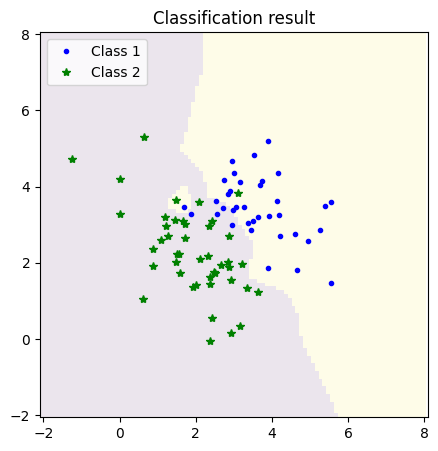

In [33]:
X1 = X_val[y_val.squeeze(1) == 1]
X2 = X_val[y_val.squeeze(1) == -1]
fig1 = plt.figure(figsize=(5,5))
ax = plot_classification(X1, X2)
ax.pcolormesh(x_mesh, y_mesh, y_pred, cmap='viridis', shading='auto', alpha=0.1)
plt.show()

## Question 5 (20 points)

Using the neural network code you developed (based on the code from class) for the deep learning homework assignment, do the following:
1. Fit a two-layer neural network with ReLU activations in the hidden layer and a logistic output layer to the training data from Question 2. Use several different numbers of hidden units in the hidden layer, and plot validation set accuracy as a function of the number of units in the hidden layer.
2. Explain which neural network is best and why, and briefly compare the neural network to the logistic regression and SVM models developed in the previous questions.

In [2]:
# Place code to build, train, and evaluate your PyTorch model here

import torch   #general pytorch
import torch.nn as nn  #neural network module
import torch.nn.functional as F  #useful functions like softmax, or relu

#pip install torchvision; conda install torchvision
from torchvision import datasets, transforms  #transforms for image processing
from torch.utils.data import DataLoader       #dataloader for preparing batch

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from torch.autograd import Variable


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
points = 200
mu_1 = np.array([2,2])
mu_2 = np.array([3.5,3.5])
sigma_1 = np.array([[-1, 0.5], [0.5, -1]])
sigma_2 = np.array([[-1, 0.5], [0.5, -1]])
X1 = np.random.multivariate_normal(mu_1, sigma_1,points)
X2 = np.random.multivariate_normal(mu_2, sigma_2,points)
X = np.concatenate((X1,X2),axis=0)

y1 = np.zeros((points,1))
y2 = np.ones((points,1))
y = np.concatenate((y1, y2), 0)

/tmp/ipykernel_29115/1198833405.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal(mu_1, sigma_1,points)
/tmp/ipykernel_29115/1198833405.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mu_2, sigma_2,points)


In [47]:
# Place code to build, train, and evaluate your PyTorch model here
class LinearModel(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.sigmoid(out)
        
        return out

In [40]:
# Place code to split the data, fit the LR model, output accuracy, and plot the result here
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    #percent_train = 0.6
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test,y_train, y_test

X_train, X_val, y_train, y_val = partition(X, y, 0.8)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(320, 2) (80, 2) (320, 1) (80, 1)


In [56]:
device = 'cuda'

In [57]:
model = LinearModel(2, 5, 1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [58]:
X_train_tensor = torch.tensor(X_train).to(torch.float32)
y_train_tensor = torch.tensor(y_train).to(torch.float32)

print(X_train_tensor.shape, y_train_tensor.shape)

torch.Size([320, 2]) torch.Size([320, 1])


In [59]:
hidden_size_list = [5, 10, 1]

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
torch.manual_seed(999)

for m in hidden_size_list:    
    model = LinearModel(2, m, 1).to(device)
    epochs = 2000
    batch_size = 10
    loss_log = []
    y_true = []
    y_pred = []
    train_yhat = []
    running_loss = 0
    total_loss = 0

    prev_loss = torch.tensor(999)
    flag = 0

    for e in range(epochs):
        for i in range(0, X_train_tensor.shape[0], batch_size):
            x_mini = X_train_tensor[i:i + batch_size]
            y_mini = y_train_tensor[i:i + batch_size]
            
            x_var = Variable(x_mini, requires_grad=True).to(device)
            y_var = Variable(y_mini, requires_grad=True).to(device)

            # Forward pass
            output = model(x_var.float())
            #loss = criterion(output, y_var.unsqueeze(1)) 
            loss = criterion(output, y_var)

            # Append loss
            

            # Backward propagation and optimizer
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Running loss
            #running_loss += loss.item() * x_var.size(0)
            #epoch_loss = running_loss / X_train_tensor.shape[0]
            
            # Predict
            pred = np.round(output.detach().cpu().numpy())
            y_var = y_var.float()
            y_true.extend(y_var.tolist()) 
            y_pred.extend(pred.reshape(-1).tolist())
        
            '''
            #Early stopping

            if np.abs(loss.detach().cpu().numpy() - prev_loss.detach().cpu().numpy()) < 1e-16:
                print(f'Hidden size : {m} : Loss {loss} Accuracy on training set is : {accuracy_score(y_true,y_pred)} break on epochs {e}')
                flag = 999
                break
            else:
                prev_loss = loss
        if flag == 999:
            break
            '''
            
                
            

        #if e % 50 == 1:
            #print(f'Epochs {e:2.0f}, Loss = {epoch_loss:.5f} Accuracy = {accuracy_score(y_true,y_pred)}')
            #loss_log.append(loss.item())
            
    #print(" Total Loss is ", loss.item())
        if e % 200 == 0:
            loss_log.append(loss)
            print(f'Hidden size : {m} : Loss {loss} Accuracy on training set is : {accuracy_score(y_true,y_pred)}')
    print(f'Hidden size : {m} Accuracy on training set is : {accuracy_score(y_true,y_pred)}')

Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 : Loss 0.6931471824645996 Accuracy on training set is : 0.4875
Hidden size : 5 Accuracy on training set is : 0.4875
Hidden size : 10 : Loss 0.6931471824645996 Accuracy on training set is : 0.459375
Hidden size : 10 : Loss 0.6931471824645996 Accuracy on training set is : 0.

## Question 6 (10 points)

Consider what would happen if you got the data from Question 1 *without labels* and were tasked with using unsupervised learning to model and understand the data set. Based on a quick visualization, you see that there seem to be two main clusters in the data and decide to build a $k$-means ($k$=2) or GMM for the dataset.

Obviously, a GMM would be appropriate, as the data were generated from a mixture of Gaussians in the first place. On the other hand, the $k$-means model would be simpler. Would it be as effective?

Do the following:
1. Write the parameters $\phi_1$, $\phi_2$, $\mathbf{\mu}_1$, $\mathbf{\mu}_2$, $\mathtt{\Sigma}_1$, $\mathtt{\Sigma}_2$ of the "ground truth" model used to generate the data in Question 1.
2. Briefly discuss whether, in practice, the $k$-means model would be worse than, equally good, or better than a GMM for this dataset.



In [4]:
def init_gmm(X, k):
    m = X.shape[0]
    n = X.shape[1]
    Mu = np.zeros((n,k))
    Sigma = np.zeros((k,n,n))
    Phi = np.zeros(k)
    order = np.random.permutation(m)
    for j in range(k):
        # Initially assign equal probability to each cluster/outcome
        Phi[j] = 1/k      
        # Ramdomly assign mean to one of the data points       
        Mu[:,j] = X[order[j],:].T
        # Initial covariance is identity matrix
        Sigma[j,:,:] = np.eye(n)    
    return Phi, Mu, Sigma


def Gaussian(X, mean, covariance):
    k = len(mean)
    X = X - mean.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * np.sum(X @ np.linalg.pinv(covariance) * X, axis=1))
    return p

def gaussian(x, mean,covariance):
    k = len(mean)
    X = (x - mean).reshape(-1,1)
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * (X.T @ np.linalg.pinv(covariance) @ X))
    return p


# Run one iteration of EM

def iterate_em_gmm(X, threshold, Phi, Mu, Sigma):
    m = X.shape[0]
    n = X.shape[1]
    k = len(Phi)
    threshold = np.reshape(np.repeat(threshold, n*k), (n,k))
    pj_arr = np.zeros((m,k))
    
    # E-step: calculate w_j^i
    W = np.zeros((m, k))
    for j in range(k):
        pj = Gaussian(X, Mu[:,j], Sigma[j])
        pj_arr[:,j] = pj
        W[:,j] = Phi[j] * pj
    
    # W tells us what is the relative weight of each cluster for each data point
    W[:,:] = W * np.tile(1/np.sum(W,1),(k,1)).T

    # M-step: adjust mean and sigma
    Phi[:] = sum(W) / m
    Mu_previous = Mu.copy()
    for j in range(k):
        # Split cluster specific W for each dimension
        Wj = np.tile(W[:,j],(2,1)).T
        # Compute Mu for each variable for each cluster
        Mu[:,j] = sum(X * Wj)/sum(Wj)
        Muj = np.tile(Mu[:,j],(m,1))
        Sigma[j,:,:] = np.matmul((X - Muj).T, (X - Muj) * Wj) / sum(W[:,j])

    if (abs(Mu-Mu_previous) <= threshold).all():
        converged = True
    else:
        converged = False

    labels = np.argmax(pj_arr, axis = 1)
    pj = np.max(pj_arr,axis=1)
    X_label = np.insert(X, 2, labels, axis=1)
    return converged, pj, X_label

In [6]:
threshold = np.matrix(.01)
k = 2


Phi, Mu, Sigma = init_gmm(X, k)

converged = False
while not converged:
    converged, pj, X_label = iterate_em_gmm(X, threshold, Phi, Mu, Sigma)

In [7]:
print('Phi',Phi)
# print(phi_gt)
# phi_gt = np.array(phi_gt).reshape(-1,1)
# phi_mse = np.mean(np.min((Phi-phi_gt)**2,axis=1))
# print(phi_mse)

print('Mu',Mu)
# print(np.array(means_gt).T)

print('Sigma',Sigma)
# print(sigmas_gt)

Phi [0.40639508 0.59360492]
Mu [[2.27098439 3.22622601]
 [3.08526247 2.46145053]]
Sigma [[[1.34497995 0.0878528 ]
  [0.0878528  1.48231605]]

 [[1.27517988 0.08628806]
  [0.08628806 1.50257359]]]


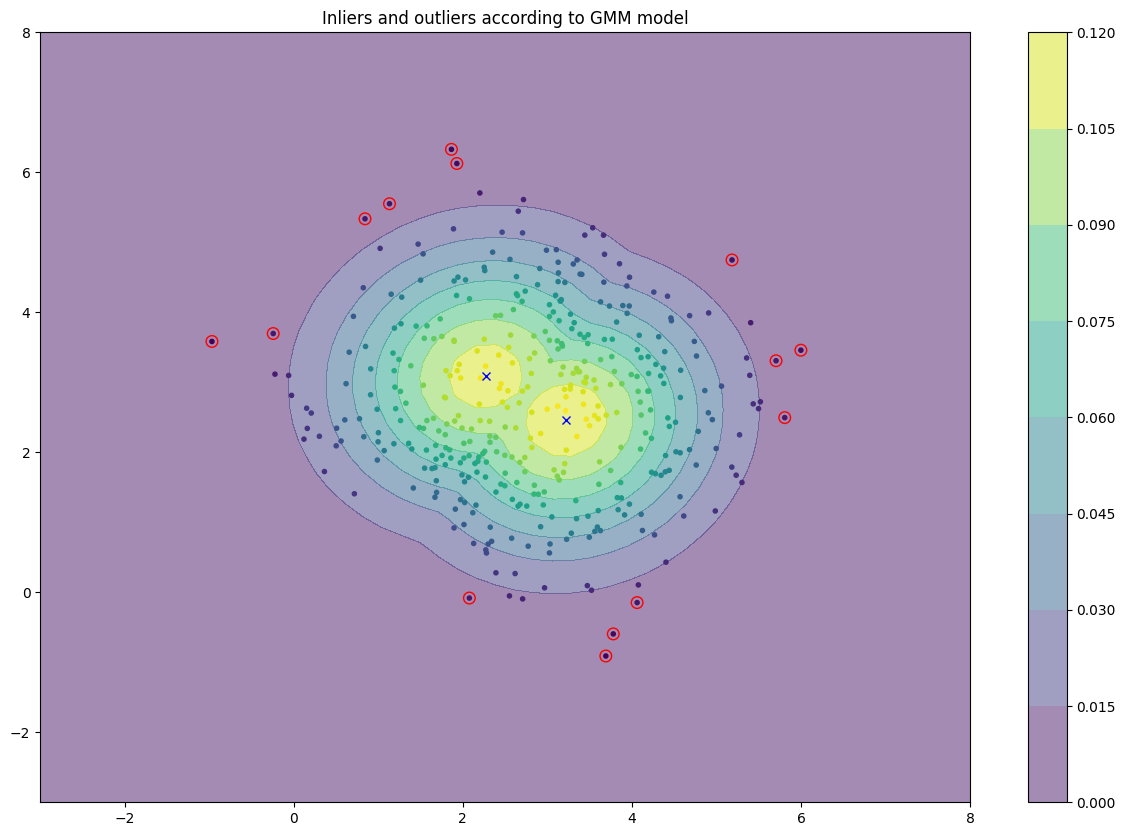

In [8]:
outlier_prob = .01
outliers = np.nonzero(pj < outlier_prob)[0]

fig1 = plt.figure(figsize=(15,10))

xlist = np.linspace(-3, 8, 50)
ylist = np.linspace(-3, 8, 50)
XX, YY = np.meshgrid(xlist, ylist)
ZZ = np.zeros(XX.shape)

for c in np.arange(0,k):    
    X_class = X[np.where(X_label[:,2] == c)[0],:]
    
    Z = np.zeros(XX.shape)
    i = 0
    while i < XX.shape[0]:
        j = 0
        while j < XX.shape[0]:
            pt = np.array([[XX[i,j], YY[i,j]]])
            Z[i,j] = Gaussian(pt, Mu[:,c], Sigma[c])[0]
            j = j + 1
        i = i + 1    
    ZZ = np.maximum(ZZ,Z)
cp = plt.contourf(XX, YY, ZZ,alpha=0.5)
cbar = fig1.colorbar(cp)

plt.scatter(X[:,0],X[:,1],marker=".",c=pj,cmap='viridis');
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);
plt.plot(Mu[0,0], Mu[1,0],'bx',Mu[0,1], Mu[1,1],'bx')

plt.title('Inliers and outliers according to GMM model')
plt.show()

Iter 0 : distortion = 4.362504
Iter 20 : distortion = 2.058866
Iter 40 : distortion = 2.058866
Iter 60 : distortion = 2.058866
Iter 80 : distortion = 2.058866


/tmp/ipykernel_29115/2292849582.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0],X[:,1],cmap='green')


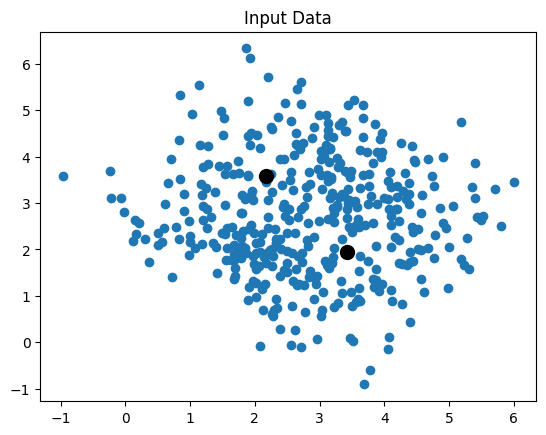

In [9]:
iters = 100
m,n = X.shape
k = 2
indices = np.arange(m)
np.random.shuffle(indices)

#1. Initialize means
means = X[indices[0:2],:]
means

#2. Repeat until convergence

C = np.zeros(m,dtype=int)
for iter in range(iters):
    if iter == iters-1:
        plt.scatter(X[:,0],X[:,1],cmap='green')
        plt.scatter(means[:,0],means[:,1],c ='black',s=100)
        plt.title('Input Data')
        plt.show()
    #2.1 map each datum to its nearest cluster center
    dist = 0
    for i in range(m):
        C[i] = np.argmin(np.linalg.norm(X[i,:]-means,axis=1))
        dist = dist + np.linalg.norm(X[i,:]-means[C[i],:])**2
    dist = dist/m
    if iter % 20 == 0:
        print('Iter %d : distortion = %f' % (iter,dist))
    
    #2.2 adjust means
    for j in range(k):
        means[j,:]=np.mean(X[C==j],axis=0)